In [1]:
'''
Visualize the census bureau databset(Adult data sets)by plotting the following graphs using 
Python. (Define objective for every graph)  
f. Histograms    
g. Dot Plots   
h. Bar Plots   
i. Line Charts   
j. Add Histogram and Scatter plot to box plot.    

Visualize the census bureau databset(Adult data sets)by plotting the following graphs using 
Python. (Define objective for every graph)     
b. Pie Charts   
c. Box Plots   
d. Scatter Plots   
e. Add boxplots to a scatterplot 
'''

'\nVisualize the census bureau databset(Adult data sets)by plotting the following graphs using \nPython. (Define objective for every graph)  \nf. Histograms    \ng. Dot Plots   \nh. Bar Plots   \ni. Line Charts   \nj. Add Histogram and Scatter plot to box plot.    \n\nVisualize the census bureau databset(Adult data sets)by plotting the following graphs using \nPython. (Define objective for every graph)     \nb. Pie Charts   \nc. Box Plots   \nd. Scatter Plots   \ne. Add boxplots to a scatterplot \n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'DSBDALExam DataSets\Adult\adult.csv', header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Set correct column names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
data.columns = columns

In [6]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


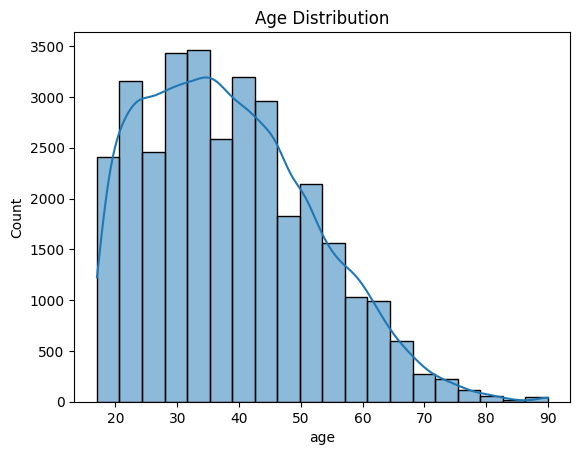

In [7]:
# Histogram
# Visualize the distribution of age

sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

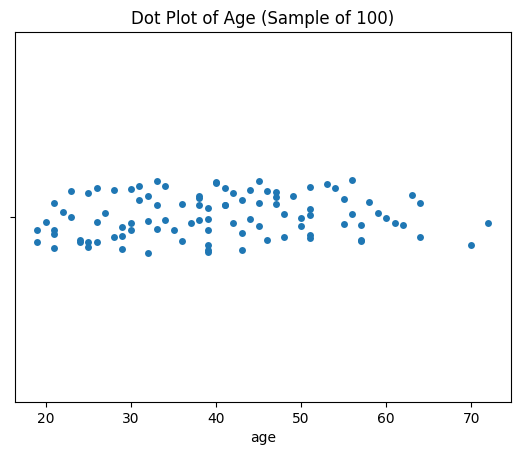

In [12]:
# Dot Plots
# View individual age valules for a small sample

sns.stripplot(x='age', data=data.sample(100))
plt.title('Dot Plot of Age (Sample of 100)')
plt.show()

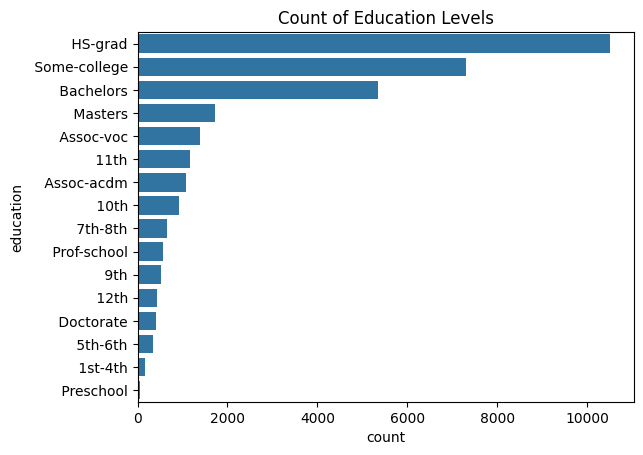

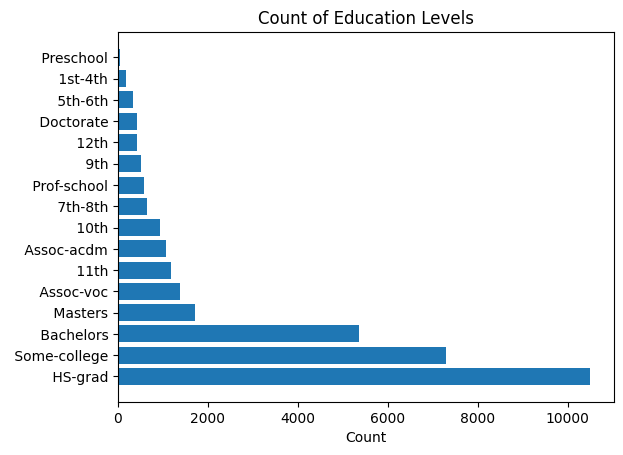

In [14]:
# Bar Plot
# Show count of different education levels

sns.countplot(data=data, y='education', order=data['education'].value_counts().index)
plt.title('Count of Education Levels')
plt.show()

education_counts = data['education'].value_counts()
plt.barh(education_counts.index, education_counts.values)
plt.title("Count of Education Levels")
plt.xlabel("Count")
plt.show()

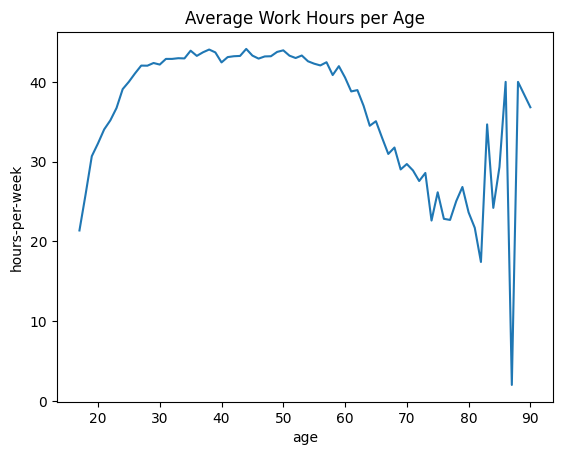

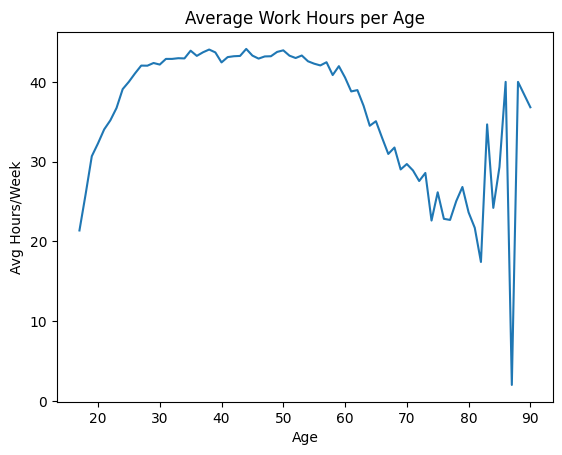

In [16]:
# Line chart
# Average hours-per-week for each age

avg_hours = data.groupby('age')['hours-per-week'].mean().reset_index()
sns.lineplot(x='age', y='hours-per-week', data=avg_hours)
plt.title('Average Work Hours per Age')
plt.show()

avg_hours = data.groupby('age')['hours-per-week'].mean()
plt.plot(avg_hours.index, avg_hours.values)
plt.title("Average Work Hours per Age")
plt.xlabel("Age")
plt.ylabel("Avg Hours/Week")
plt.show()

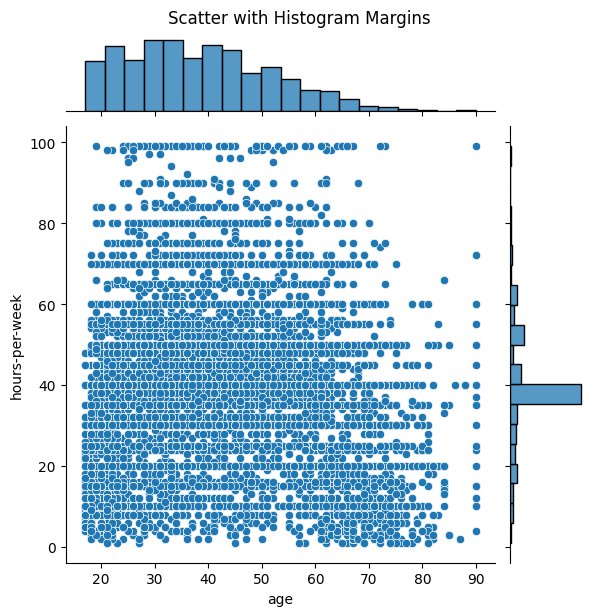

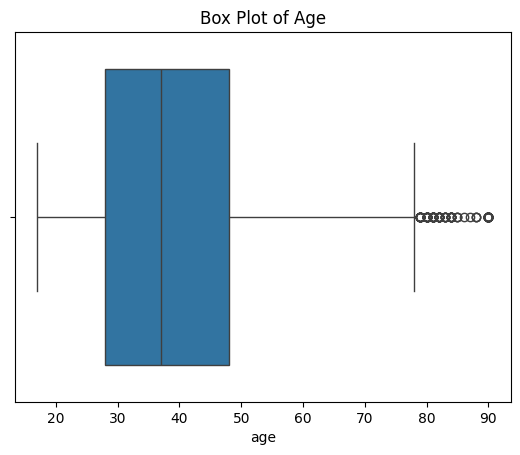

In [18]:
# Add histogram and scatter plot to box plot
# Combine histogram, scatter, and box plot for visual comparison of age vs hours per week

sns.jointplot(data=data, x='age', y='hours-per-week', kind='scatter', marginal_kws=dict(bins=20, fill=True))
plt.suptitle('Scatter with Histogram Margins', y=1.02)
plt.show()

sns.boxplot(x='age', data=data)
plt.title('Box Plot of Age')
plt.show()

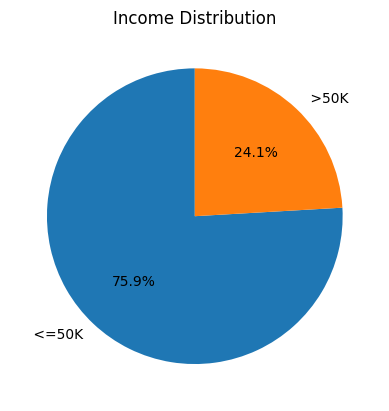

In [20]:
# Pie charts
# Proportional breakdown of income categories

income_counts = data['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Income Distribution')
plt.show()

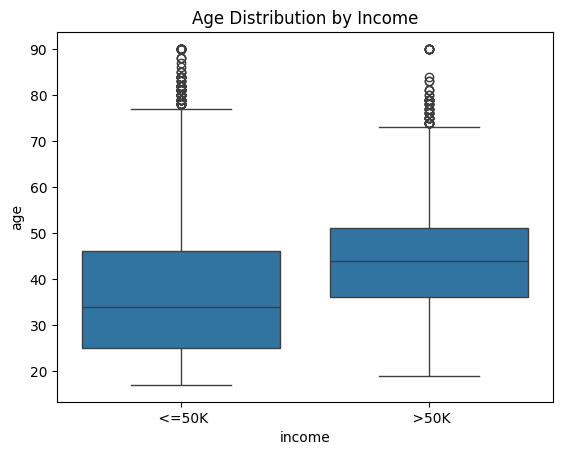

In [21]:
# Box plot
# Compare Age Distribution across income groups

sns.boxplot(x='income', y='age', data=data)
plt.title('Age Distribution by Income')
plt.show()

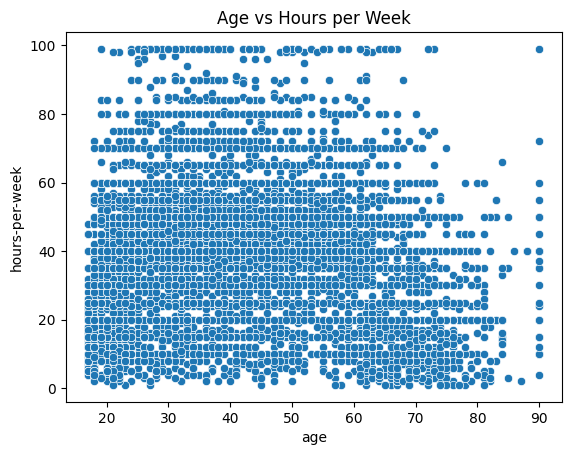

In [24]:
# Scatter plots
# Explore relationship between age and hours-per-week

sns.scatterplot(x='age', y='hours-per-week', data=data)
plt.title('Age vs Hours per Week')
plt.show()

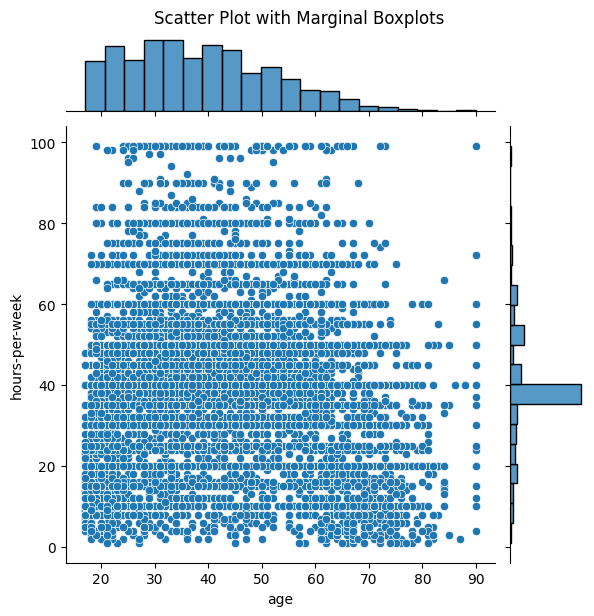

In [25]:
# Add Boxplots to a Scatter Plot
# Enchance scatter plot with boxplot along axes

sns.jointplot(data=data, x='age', y='hours-per-week', kind='scatter', marginal_kws=dict(bins=20, fill=True))
plt.suptitle('Scatter Plot with Marginal Boxplots', y=1.02)
plt.show()

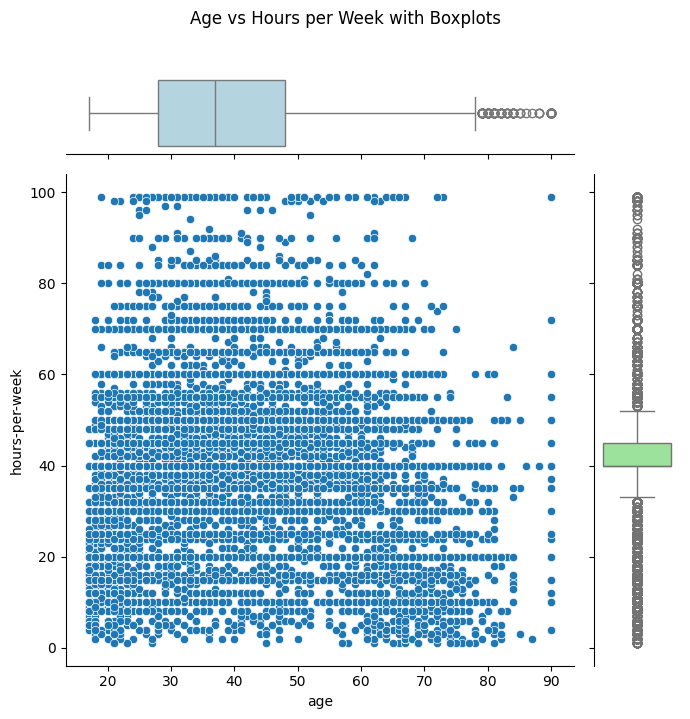

In [27]:
# Create a JointGrid
g = sns.JointGrid(data=data, x="age", y="hours-per-week", height=7)

# Main scatterplot in the center
g.plot_joint(sns.scatterplot)

# Boxplots on the margins
sns.boxplot(data=data, x="age", ax=g.ax_marg_x, color='lightblue')
sns.boxplot(data=data, y="hours-per-week", ax=g.ax_marg_y, color='lightgreen')

# Add title
plt.suptitle("Age vs Hours per Week with Boxplots", y=1.02)
plt.tight_layout()
plt.show()